In [ ]:
import pandas as pd
import os 
from os import listdir
from os.path import isfile, join 
import glob
import re
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
import io
from scipy.stats import ttest_ind
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

In [ ]:
path=os.getcwd()
print(path)
from google.colab import drive
drive.mount('/content/drive')

/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.ExcelFile('/content/drive/My Drive/Arrests.xlsx')

In [ ]:
table1 = pd.read_excel(df,'Arrests_and_Strip_Searches_(RBD')
table1.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
booked_yes = table1[table1['Booked'] == 'yes']['Sex']
booked_no = table1[table1['Booked'] == 'no']['Sex']

Text(0.5, 1.0, 'Booking Status by Race')

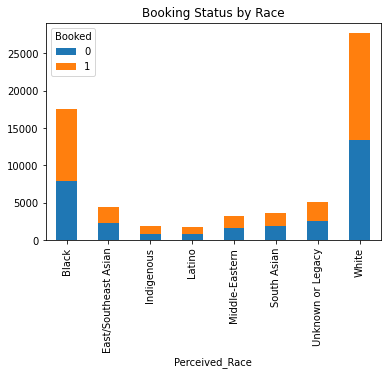

In [ ]:
#EDA grapghs
# Bar Chart for booked by race 
grouped_data = table1.groupby('Perceived_Race')['Booked'].value_counts().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Booking Status by Race')

In [ ]:
table1['Sex'] = table1['Sex'].replace({0: 'male', 1: 'female'})

Text(0.5, 1.0, 'Booking Status by Sex')

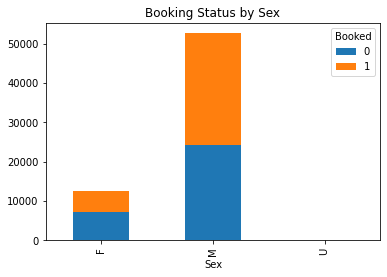

In [ ]:
# Bar Chart for booked by sex 
grouped_data = table1.groupby('Sex')['Booked'].value_counts().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Booking Status by Sex')

Text(0.5, 1.0, 'Booking Status by Age Group ')

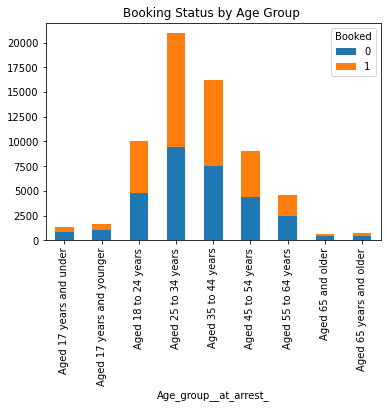

In [ ]:
# Bar Chart for booked by age group
grouped_data = table1.groupby('Age_group__at_arrest_')['Booked'].value_counts().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Booking Status by Age Group ')

Text(0.5, 1.0, 'Booking Status by Acitions Concealed ')

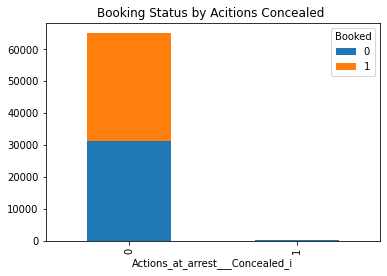

In [ ]:
# Bar Chart for booked by actions
grouped_data = table1.groupby('Actions_at_arrest___Concealed_i')['Booked'].value_counts().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Booking Status by Acitions Concealed ')

Text(0.5, 1.0, 'Booking Status by Acitions Combative ')

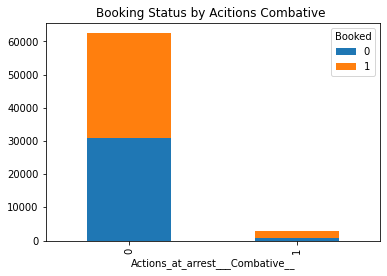

In [ ]:
# Bar Chart for booked by actions
grouped_data = table1.groupby('Actions_at_arrest___Combative__')['Booked'].value_counts().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Booking Status by Acitions Combative ')

In [ ]:
# Replace 'M' and 'F' with 0 and 1 respectively
table1['Sex'] = table1['Sex'].replace({'M': 0, 'F': 1})

# Replace 'U' with NaN
table1['Sex'] = table1['Sex'].replace({'U': np.nan})

# Drop the NaN values
table1 = table1.dropna()

# Convert the column to integers
table1['Sex'] = table1['Sex'].astype(int)










<ipython-input-26-5c93a9592161>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table1['Sex'] = table1['Sex'].astype(int)


In [ ]:
# t test for booked and sex
tStat, pValue = stats.ttest_ind(table1['Sex'][table1['Booked'] == 1], 
                                table1['Sex'][table1['Booked'] == 0], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.5822700263828706 T-Statistic:0.5517787523981469


In [ ]:
# t test for booked and actions concealed
tStat, pValue = stats.ttest_ind(table1['Actions_at_arrest___Concealed_i'][table1['Booked'] == 1], 
                                table1['Actions_at_arrest___Concealed_i'][table1['Booked'] == 0], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.5474659919656182 T-Statistic:0.6034870468926516


In [ ]:
# t test for booked and actions combative 
tStat, pValue = stats.ttest_ind(table1['Actions_at_arrest___Combative__'][table1['Booked'] == 1], 
                                table1['Actions_at_arrest___Combative__'][table1['Booked'] == 0], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.15116604656296828 T-Statistic:1.445819223466016


In [ ]:
# tukey test for booked and sex 
tukey_results = pairwise_tukeyhsd(table1['Booked'], table1['Sex'])

# Print results
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1    0.002 0.6071 -0.0053 0.0092  False
---------------------------------------------------


In [ ]:
# tukey test for booked and actions concealed 
tukey_results = pairwise_tukeyhsd(table1['Booked'], table1['Actions_at_arrest___Concealed_i'])

# Print results
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0054 0.6399 -0.0164 0.0271  False
---------------------------------------------------


In [ ]:
# tukey test for booked and actions combative 
tukey_results = pairwise_tukeyhsd(table1['Booked'], table1['Actions_at_arrest___Combative__'])

# Print results
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
     0      1   0.0056 0.2367 -0.0037 0.015  False
--------------------------------------------------


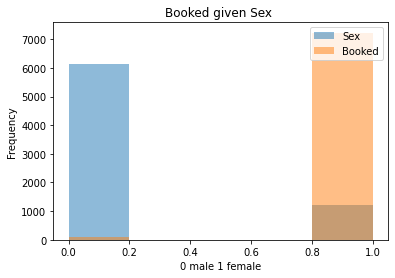

In [ ]:
#interaction plots 
plt.hist(table1['Sex'], bins=5, alpha=0.5, label='Sex')
plt.hist(table1['Booked'], bins=5, alpha=0.5, label='Booked')

# add a legend and labels
plt.legend(loc='upper right')
plt.xlabel('0 male 1 female')
plt.ylabel('Frequency')
plt.title('Booked given Sex ')

# show the plot
plt.show()

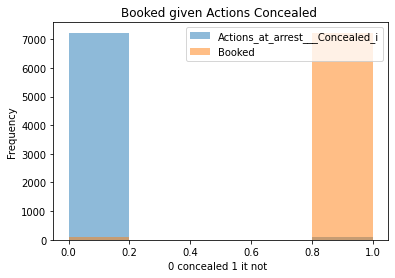

In [ ]:
#interaction plots 
plt.hist(table1['Actions_at_arrest___Concealed_i'], bins=5, alpha=0.5, label='Actions_at_arrest___Concealed_i')
plt.hist(table1['Booked'], bins=5, alpha=0.5, label='Booked')

# add a legend and labels
plt.legend(loc='upper right')
plt.xlabel('0 concealed 1 it not  ')
plt.ylabel('Frequency')
plt.title('Booked given Actions Concealed ')

# show the plot
plt.show()

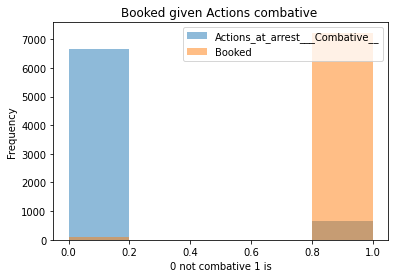

In [ ]:
#interaction plots 
plt.hist(table1['Actions_at_arrest___Combative__'], bins=5, alpha=0.5, label='Actions_at_arrest___Combative__')
plt.hist(table1['Booked'], bins=5, alpha=0.5, label='Booked')

# add a legend and labels
plt.legend(loc='upper right')
plt.xlabel('0 not combative 1 is')
plt.ylabel('Frequency')
plt.title('Booked given Actions combative ')

# show the plot
plt.show()